In [112]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#get the url
URL = "https://cmsc320.github.io/files/top-50-solar-flares.html"
r = requests.get(url = URL)
#extract the text
text = BeautifulSoup(r.text, 'html.parser')
#read the data
table = text.find('table')
data = pd.concat(pd.read_html(str(table), flavor="bs4"))
#set the name
data.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
data

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [114]:
#drop the last column of the table
data.pop(data.columns[-1])
#combine the date
data['start_datetime'] = pd.to_datetime(data['date'] + ' ' + data['start_time'])
data['max_datetime'] = pd.to_datetime(data['date'] + ' ' + data['maximum_time'])
data['end_datetime'] = pd.to_datetime(data['date'] + ' ' + data['end_time'])
#drop the unnessary columns
dara = data.drop(['date','start_time', 'maximum_time', 'end_time'], axis=1)
#rearrange the order
data = data[['rank', 'x_classification', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]
#set regions coded as - as NaN
data.replace('-', 'NaN')
data

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [115]:
#get the url
URL = "https://cmsc320.github.io/files/waves_type2.html"
r = requests.get(url = URL)
#extract the text
text = BeautifulSoup(r.text, 'html.parser')
#read the data
new_data = text.find('pre').get_text().splitlines()
del new_data[0:12]
del new_data[-1:]
#set the name
new_data = pd.DataFrame(new_data)
new_data[['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 
'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 
'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'del1', 
'del2', 'del3','del4','del5','del6','del7','del8','del9','del10']] = new_data[0].str.split(expand=True)
#drop useless columns
new_data = new_data.iloc[: ,1:]
new_data.drop(new_data.loc[:, 'del1':'del10'].columns, axis = 1,  inplace = True)
new_data

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


In [116]:
#set any missing entries as NaN
new_data.replace(['----', '-----', '------', '--/--', '--:--', '????'], 'NaN', inplace = True)
#create a new column that indicates if a row corresponds to a halo flare or not 
is_halo = []
for row, col in new_data.iterrows():
    col = col.tolist()
    if (col[11] == 'Halo'): 
        is_halo.append("true")
    else:
        is_halo.append("false")
new_data['is_halo'] = is_halo
#replace Halo entries in the cme_angle column as NA
new_data['cme_angle'].replace('Halo', 'NA')
#create a new column that indicates if width is given as a lower bound
with_lower_bound = []
for row, col in new_data.iterrows():
    col = col.tolist()
    if (('>') in col[12]): 
        with_lower_bound.append("true")
    else:
        with_lower_bound.append("false")       
new_data['with_lower_bound'] = with_lower_bound
#remove any non-numeric part of the width column
width = []
for row, col in new_data.iterrows():
    col = col.tolist()
    if (col[12].isnumeric()): 
        width.append(col[12])
    else:
        width.append("")       
new_data['cme_width'] = width
#combine date and time columns for start, end and cme
new_data['end_time'].replace('24:00', '00:00', inplace = True)
start_datetime = []
end_datetime = []
cme_datetime = []
for row, col in new_data.iterrows(): 
    year = col['start_date'][:5]
    # start_datetime
    col['start_date'] = col['start_date'] + ' ' + col['start_time']
    col['start_date'] = pd.to_datetime(col['start_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    # end_datetime
    col['end_date'] = year + col['end_date'] + ' ' + col['end_time']
    col['end_date'] = pd.to_datetime(col['end_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S') 
    # cme_datetime
    col['cme_date'] = year + col['cme_date'] + ' ' + col['cme_time']
    col['cme_date'] = pd.to_datetime(col['cme_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
#drop the unnessary columns
new_data.drop(['start_time', 'end_time', 'cme_time'], axis = 1, inplace = True)
new_data = new_data.rename(columns={'start_date' : 'start_datetime', 'end_date' : 'end_datetime', 'cme_date' : 'cme_datetime'})
new_data

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,with_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,false,false
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,Halo,360,878,true,false
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,Halo,360,464,true,false
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,false,false
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,Halo,360,1418,true,false
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,Halo,360,1571,true,false
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,Halo,360,3163,true,false
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,false,false


In [117]:
#for question 1, I get all data start with 'X' at first
#then, I extract the data with 'X' from the table
#sort the value and get the the top 50
#while the flare class from the first dataset ranges from 2.6 to 28.0
#the NASA dataset has flare class ranging from 1.9 to 28.0
top50 = []
for row, col in new_data.iterrows():
    col = col.tolist()  
    if (('X') in col[6]):
        top50.append("true")     
    else:
        top50.append("false")
new_data['top50'] = top50
nasa_top50 = new_data[new_data['top50'] == 'true']
nasa_top50['classification'] = (nasa_top50['flare_classification'].str)[1:]
nasa_top50['classification'] = nasa_top50['classification'].astype(float)
# sort the value in decending order
nasa_top50 = nasa_top50.sort_values(['classification'], ascending = False)
nasa_top50.drop(['top50', 'classification'], axis = 1, inplace = True)
nasa_top50 = nasa_top50.head(50)
nasa_top50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,with_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,Halo,360,2657,true,false
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,false,false
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,Halo,360,2459,true,false
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,false,false
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,Halo,360,2029,true,false
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,Halo,360,1556,true,false
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,Halo,360,1571,true,false
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,,NaN,false,false
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,Halo,360,2598,true,false
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,Halo,360,3163,true,false


In [118]:
#for question 2, I use pd.merge to create a new table with the same classification from the NASA and SpaceWeatherLive table
#if more than one SpaceWeatherLive entry "best matches", I will choose the one with same start year
#I defined the best matching rows across the two datasets to be the ones that have the same classification
#I found 51 such matches in the NASA and SpaceWeatherLive table
nasa_top50['x_classification'] = nasa_top50['flare_classification']
mergeData = pd.merge(data, nasa_top50, how = 'inner', on = 'x_classification')
mergeData

,rank,x_classification,start_datetime_x,max_datetime,end_datetime_x,region,start_datetime_y,end_datetime_y,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,with_lower_bound
0,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,Halo,360,1556,true,false
1,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,Halo,360,1571,true,false
2,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,Halo,360,2598,true,false
3,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,Halo,360,3163,true,false
4,12,X7.1,2005-01-20 06:36:00,2005-01-20 07:01:00,2005-01-20 07:26:00,720,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,Halo,360,882,true,false
5,13,X6.9,2011-08-09 07:48:00,2011-08-09 08:05:00,2011-08-09 08:08:00,1263,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,Halo,360,1610,true,false
6,14,X6.5,2006-12-06 18:29:00,2006-12-06 18:47:00,2006-12-06 19:00:00,930,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,,NaN,false,false
7,15,X6.2,2005-09-09 19:13:00,2005-09-09 20:04:00,2005-09-09 20:36:00,808,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,Halo,360,2257,true,false
8,16,X6.2,2001-12-13 14:20:00,2001-12-13 14:30:00,2001-12-13 14:35:00,9733,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,Halo,360,2257,true,false
9,17,X5.7,2000-07-14 10:03:00,2000-07-14 10:24:00,2000-07-14 10:43:00,9077,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,Halo,360,1674,true,false


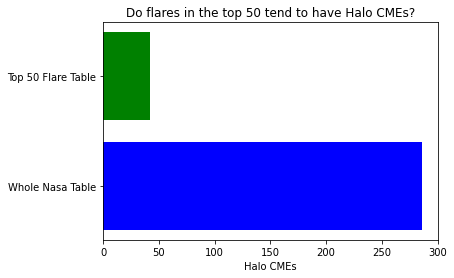

In [119]:
#for question 3, I make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole
#the dataset as a whole has 286, and the top 50 flares has 42
nasa_count = 0 
top50_count = 0
for i, j in new_data.iterrows():
  if (j['is_halo']) == 'true':
    nasa_count += 1
for i, j in nasa_top50.iterrows():
  if (j['is_halo']) == 'true':
    top50_count += 1      
y_labels = [nasa_count, top50_count]
fig, ax = plt.subplots()
ax.barh([0, 1], y_labels, 0.8, color= ['blue', 'green'])
ax.set_title('Do flares in the top 50 tend to have Halo CMEs?')
ax.set_xlabel('Halo CMEs')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Whole Nasa Table', 'Top 50 Flare Table'])
plt.show()
# print(nasa_count)
# print(top50_count)